In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [43]:
import random

def sim_lookup_response():
    l1_cost = random.gauss( 20,  3)
    l2_cost = random.gauss(200,  3) if random.random() < 0.5 else 0
    db_cost = random.gauss(800, 40) if random.random() < 0.2 else 0
    return l1_cost + l2_cost + db_cost

In [44]:
data = np.random.normal(loc=5, scale=2, size=10000)

data = [ sim_lookup_response() for i in range(1000)]

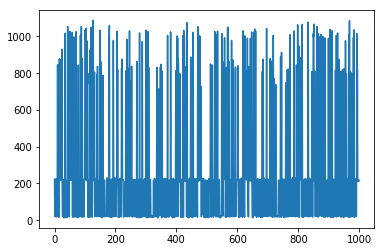

In [45]:
plt.figure()
plt.plot(data)

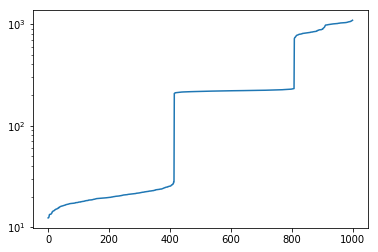

In [46]:
data.sort()
plt.figure()
plt.yscale("log")
plt.plot(data)

(array([ 414.,  790.,  808.,  808.,  808.,  808.,  814.,  889.,  916.,
        1000.]),
 array([  12.33834883,  119.92681972,  227.51529062,  335.10376151,
         442.69223241,  550.28070331,  657.8691742 ,  765.4576451 ,
         873.046116  ,  980.63458689, 1088.22305779]),
 <a list of 10 Patch objects>)

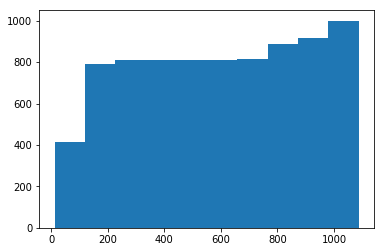

In [47]:
plt.hist(data, bins=10, cumulative=True)

In [55]:
class AsymmetricHistogram:
    
    def __init__(self, buckets, data):
        self.buckets = buckets
        self.data = data
        self._counts = [0] * len(buckets)
        for data_point in data:
            self.add_datapoint(data_point)

    def add_datapoint(self, data_point):
        for index, upper in enumerate(self.buckets):
            if data_point <= upper:
                self._counts[index] += 1
                break
        
    def counts(self):
        return list(zip(self.buckets, self._counts))
    
    def i_th(self, i):
        remaining = i
        for upper, count in self.counts():
            if remaining <= count:
                return upper
            remaining -= count
        return None

In [56]:
ah = AsymmetricHistogram([10, 15, 20, 25, 150, 175, 200, 225, 250, 700, 750, 800, 850, 900, 2000], data)

In [57]:
ah.counts()

[(10, 0),
 (15, 25),
 (20, 191),
 (25, 177),
 (150, 21),
 (175, 0),
 (200, 0),
 (225, 348),
 (250, 46),
 (700, 0),
 (750, 5),
 (800, 20),
 (850, 49),
 (900, 20),
 (2000, 98)]

In [58]:
approx = [ah.i_th(i) for i in range(len(data))]

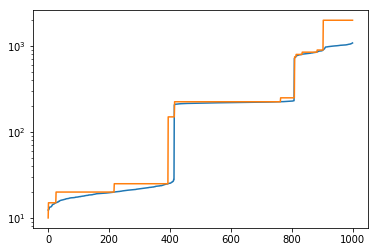

In [59]:
data.sort()
plt.figure()
plt.yscale("log")
plt.plot(data)
plt.plot(approx)